In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop.csv')

In [3]:
df.head()

Starting month  Cultivation Time  Min-Temp   Max-Temp   \
0               6                 3         24         28   
1               6                 3         25         26   
2               6                 3         26         31   
3               6                 3         24         26   
4               6                 3         23         27   

   Rainfall Requirement  Humidity    Irrigation   City  Soil Crops  
0                   956          69           0  Swabi     1  Rice  
1                  1200          85           0  Swabi     1  Rice  
2                  1540          82           0  Swabi     3  Rice  
3                  1345          79           0  Swabi     3  Rice  
4                  1111          67           0  Swabi     3  Rice

In [4]:
df.tail()

Starting month  Cultivation Time  Min-Temp   Max-Temp   \
1147               6                 4         25         31   
1148               6                 4         23         30   
1149               6                 4         24         29   
1150               6                 4         22         28   
1151               6                 4         25         32   

      Rainfall Requirement  Humidity    Irrigation    City  Soil     Crops  
1147                   774          75           1  Attock     2  Soyabean  
1148                  1065          71           1  Attock     2  Soyabean  
1149                  1179          66           1  Attock     2  Soyabean  
1150                  1245          57           1  Attock     2  Soyabean  
1151                   999          66           1  Attock     2  Soyabean

In [5]:
df.columns

Index(['Starting month', 'Cultivation Time', 'Min-Temp ', 'Max-Temp ',
       'Rainfall Requirement', 'Humidity  ', 'Irrigation', 'City', 'Soil',
       'Crops'],
      dtype='object')

In [6]:
df['Crops'].unique()

array(['Rice', 'Sugarcane', 'Ragi', 'Cotton', 'Jowar', 'Wheat', 'Bajra',
       'Soyabean'], dtype=object)

In [7]:
df['Crops'].value_counts()

Jowar        320
Sugarcane    204
Cotton       152
Soyabean     144
Wheat        129
Ragi          80
Rice          72
Bajra         51
Name: Crops, dtype: int64

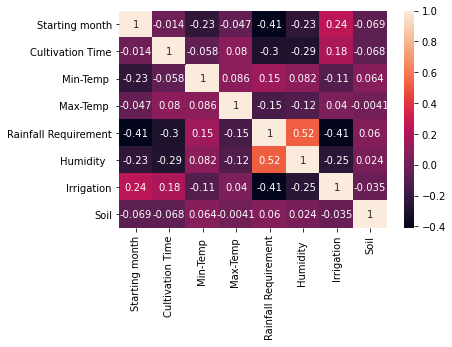

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
a=df.City
print(a.value_counts())
df.City = pd.Categorical(df.City)
df.City = df.City.cat.codes
print(df.City.value_counts())

Attock        324
Swabi         232
Peshawar      220
Multan        216
Faisalabad    160
Name: City, dtype: int64
0    324
4    232
3    220
2    216
1    160
Name: City, dtype: int64


In [10]:
features = df[['Starting month', 'Cultivation Time', 'Min-Temp ', 'Max-Temp ','Rainfall Requirement', 'Humidity  ', 'Irrigation', 'City', 'Soil']]
target = df['Crops']
labels = df['Crops']

In [11]:
acc = []
model = []

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

       Bajra       1.00      1.00      1.00        10
      Cotton       1.00      1.00      1.00        35
       Jowar       1.00      1.00      1.00        67
        Ragi       1.00      1.00      1.00        13
        Rice       1.00      1.00      1.00        15
    Soyabean       1.00      1.00      1.00        25
   Sugarcane       1.00      1.00      1.00        38
       Wheat       1.00      1.00      1.00        28

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [14]:
import pickle
# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = '../Trained_Model/DecisionTree.pkl'
# Open the file to save as pkl f0ile
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [15]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  100.0
              precision    recall  f1-score   support

       Bajra       1.00      1.00      1.00        10
      Cotton       1.00      1.00      1.00        35
       Jowar       1.00      1.00      1.00        67
        Ragi       1.00      1.00      1.00        13
        Rice       1.00      1.00      1.00        15
    Soyabean       1.00      1.00      1.00        25
   Sugarcane       1.00      1.00      1.00        38
       Wheat       1.00      1.00      1.00        28

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [16]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  59.74025974025974
              precision    recall  f1-score   support

       Bajra       0.00      0.00      0.00        10
      Cotton       1.00      0.60      0.75        35
       Jowar       0.42      1.00      0.60        67
        Ragi       1.00      0.85      0.92        13
        Rice       0.67      0.27      0.38        15
    Soyabean       1.00      0.64      0.78        25
   Sugarcane       1.00      0.32      0.48        38
       Wheat       1.00      0.25      0.40        28

    accuracy                           0.60       231
   macro avg       0.76      0.49      0.54       231
weighted avg       0.77      0.60      0.57       231

